In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_ilp = pd.read_csv("benchmarking_ilp_no_kernel", 
                 header=None, 
                 delim_whitespace=True, 
                 usecols=range(7)) # ignores solution set in the file

df_trees = pd.read_csv("benchmarking_all_solvers", 
                 header=None, 
                 delim_whitespace=True, 
                 usecols=range(7)) # ignores solution set in the file

df = df_ilp.append(df_trees, ignore_index=True)

graphs_in_order = [
    "soc-firm-hi-tech.txt", 
    "ENZYMES_g295.edges",
    "ca-netscience.mtx",
    "bio-diseasome.mtx",
    "rt-twitter-copen.mtx",
    "road-euroroad.edges",
    "bio-yeast.mtx",
    "mammalia-voles-bhp-trapping.edges",
    "ca-CSphd.mtx",
    "inf-openflights.edges", 
    "econ-poli.mtx",
    "inf-power.mtx",
    "ca-Erdos992.mtx",
    "bio-dmela.mtx",
    "bio-CE-CX.edges",
    "rec-yelp-user-business.edges",
    "soc-brightkite.mtx",
    "H2O.mtx",
    "rec-amazon.mtx",
]

/var/folders/25/22j442jd1kbbtszy07f7l15h0000gn/T/ipykernel_5849/377904929.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_ilp.append(df_trees, ignore_index=True)


<br>
<br>

### Create table for maximal solved k-value

In [4]:
def count_solved_instances(solverID, graphID):
    return ((df[0] == solverID) & 
            (df[1] == graphID) & 
            (df[6] != "TIMEOUT")
           ).sum()

In [5]:
ctr = 1
for g in graphs_in_order:
    print(str(ctr) + "   ", count_solved_instances("ILP", g))
    ctr += 1

1    30
2    30
3    30
4    30
5    30
6    30
7    30
8    30
9    30
10    30
11    30
12    30
13    30
14    30
15    5
16    28
17    30
18    1
19    30


<br>
<br>

### Analyze basis-algorithm

In [6]:
# returns runtimes of solved instances fitting the given constraints, in an ascending order
def get_times_from_df(solverID, min_k, max_k):
    valid_rows = df[  (df[0] == solverID)  &  (df[6] != "TIMEOUT")  &  (df[4] >= min_k)  &  (df[4] <= max_k)  ]
    times = list(valid_rows[6].astype("float"))
    times.append(0)
    return sorted(times)

In [7]:
def plot_times(times, color, label, max_y, style):
    plt.step(times, range(len(times)), where='post', color=color, label=label, linestyle=style)
    
    plt.xlabel("Zeit in Sekunden")
    plt.ylabel("Anzahl der gelösten Instanzen")
    
    plt.xscale("log")
    plt.xlim([10**-1, 3600])
    plt.ylim([0, max_y*1.2])

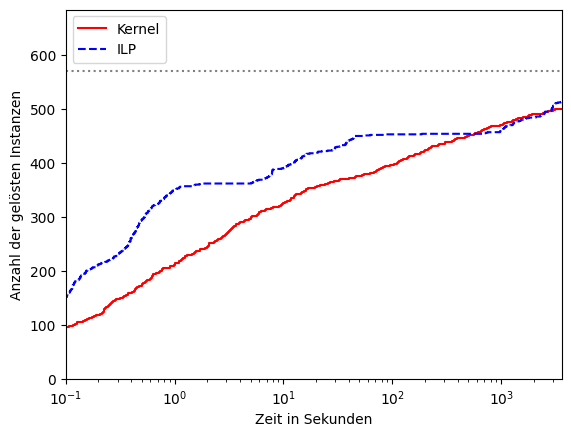

In [8]:
plot_times(get_times_from_df(solverID = "f", min_k=1, max_k=30), color="r", label="Kernel", max_y=190*3, style="-")
plot_times(get_times_from_df(solverID = "ILP", min_k=1, max_k=30), color="b", label="ILP", max_y=190*3, style="--")
plt.axhline(y=190*3, color='gray', linestyle=':')
plt.legend(loc="upper left")
plt.show()

In [9]:
times = [x for x in get_times_from_df(solverID = "f", min_k=21, max_k=30) if x < 2]
len(get_times_from_df(solverID = "f", min_k=21, max_k=30))

141

In [30]:
hits_kernel = [len(get_times_from_df(solverID = "f", min_k=k, max_k=k)) for k in range(1, 30+1)]
hits_ilp = [len(get_times_from_df(solverID = "ILP", min_k=k, max_k=k)) for k in range(1, 30+1)]

In [31]:
ctr = 1
for x in zip(hits_kernel, hits_ilp):
    print(ctr, "   ", x)
    ctr += 1

1     (20, 20)
2     (20, 19)
3     (20, 19)
4     (20, 18)
5     (20, 18)
6     (20, 18)
7     (20, 18)
8     (20, 18)
9     (20, 18)
10     (20, 18)
11     (20, 18)
12     (19, 18)
13     (19, 18)
14     (19, 19)
15     (18, 18)
16     (18, 18)
17     (18, 18)
18     (17, 19)
19     (16, 18)
20     (16, 18)
21     (16, 18)
22     (16, 18)
23     (16, 18)
24     (16, 18)
25     (16, 18)
26     (16, 18)
27     (15, 17)
28     (14, 18)
29     (13, 18)
30     (12, 17)


In [27]:
max([max(x/y, y/x) for (x, y) in zip(hits_kernel, hits_ilp)])

1.09375

<BarContainer object of 30 artists>

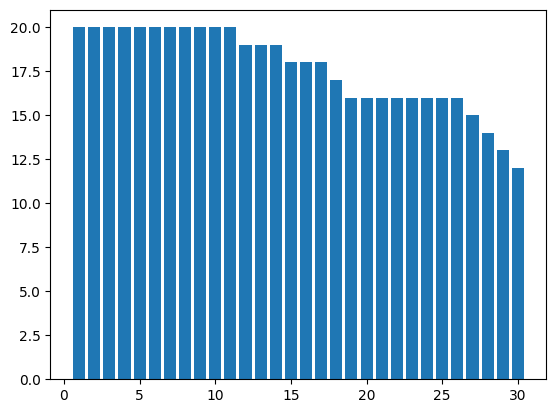

In [36]:
plt.bar(range(1, 30+1), hits_kernel)

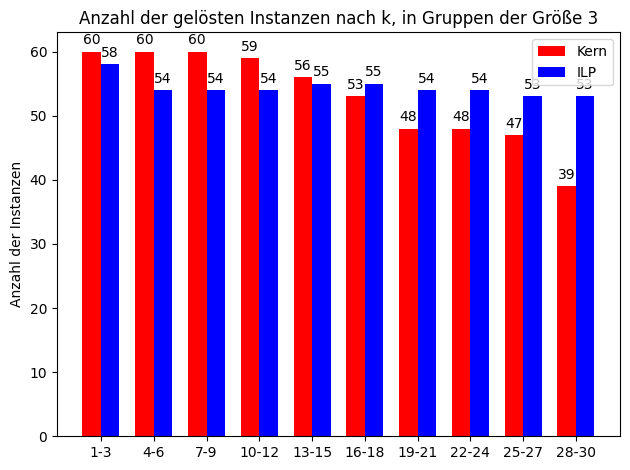

In [53]:
labels = [str(3*x+1)+ "-" +str(3*x+3) for x in range(10)]
men_means = [hits_kernel[3*x]+hits_kernel[3*x+1]+hits_kernel[3*x+2] for x in range(10)]
women_means = [hits_ilp[3*x]+hits_ilp[3*x+1]+hits_ilp[3*x+2] for x in range(10)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Kern', color="r")
rects2 = ax.bar(x + width/2, women_means, width, label='ILP', color="b")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Anzahl der Instanzen')
ax.set_title('Anzahl der gelösten Instanzen nach k, in Gruppen der Größe 3')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3 )
ax.bar_label(rects2, padding=3 )

fig.tight_layout()

plt.show()